In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Loading Data:

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df['Unnamed: 0'].duplicated().sum()

0

In [8]:
# Reframing the columns

df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [9]:
# Convert pickup_datetime to datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract useful information from pickup_datetime
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek


In [10]:
df['Monthly_Quarter'] = df.pickup_month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

In [11]:
df.shape

(199987, 15)

In [12]:
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_day_of_week,Monthly_Quarter
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,7,19,5,3,Q2
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,17,20,7,4,Q3
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,24,21,8,0,Q3
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,26,8,6,4,Q2
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,28,17,8,3,Q3
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011-02-12,12,2,2,5,Q1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,2014-10-12,12,7,10,6,Q4
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2012-12-11,11,13,12,1,Q4
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2012-02-17,17,9,2,4,Q1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,2012-03-29,29,19,3,3,Q1


# 
 * The 'key' and 'pickup_datetime' both are having the same value so we can drop one among them.
 
 * Since we have already converted the 'pickup_datetime' into 'date','hour'and 'day of week' we can drop the column 'key'.

In [13]:
df=df.drop(columns='key')

In [14]:
df.shape

(199987, 14)

# Checking for the missing values:

In [15]:
df.isnull().mean()

Unnamed: 0            0.0
fare_amount           0.0
pickup_datetime       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
passenger_count       0.0
pickup_date           0.0
pickup_day            0.0
pickup_hour           0.0
pickup_month          0.0
pickup_day_of_week    0.0
Monthly_Quarter       0.0
dtype: float64

In [16]:
df.isnull().sum()

Unnamed: 0            0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_month          0
pickup_day_of_week    0
Monthly_Quarter       0
dtype: int64

In [17]:
df=df.dropna(how = 'any', axis=0)

In [18]:
df.isnull().sum()

Unnamed: 0            0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_month          0
pickup_day_of_week    0
Monthly_Quarter       0
dtype: int64

In [19]:
df['Unnamed: 0'].duplicated().sum()

0

In [20]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_date', 'pickup_day', 'pickup_hour',
       'pickup_month', 'pickup_day_of_week', 'Monthly_Quarter'],
      dtype='object')

# We need to convert pickup and drop points into distance in miles:
 
 * Haversine formula
  * dlon = lon2 - lon1
  * dlat = lat2 - lat1
  * a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
  * c = 2 * np.arcsin(np.sqrt(a))
  * distance= c*r             #where r is the radius of earth
 

In [21]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in miles
    r = 3956
    
    # Calculate the result
    return c * r

# Apply the function to the dataframe
df['distance_miles'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

df.head()


,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_month,pickup_day_of_week,Monthly_Quarter,distance_miles
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,7,19,5,3,Q2,1.045240
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,17,20,7,4,Q3,1.526012
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,24,21,8,0,Q3,3.127281
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,26,8,6,4,Q2,1.031803
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,28,17,8,3,Q3,2.778980


In [22]:
df['distance_miles'].describe()

count    199987.000000
mean         12.766703
std         235.721180
min           0.000000
25%           0.754544
50%           1.316902
75%           2.406000
max        5453.641012
Name: distance_miles, dtype: float64

# 
 * As we can see that in column 'distance_miles' the minimun value is o.
 
 * Distance can't be 0.
 
 * This is only possible is the customer had a round trip which makes the distance 0 or this can be an error while collecting      data who's probabilty is quite high.
 
 * To confirm this we will look at the 'pickup_longitude','pickup_latitude', 'dropoff_longitude' and 'dropoff_latitude' 
   where 'distance_miles' is equal to 0.

In [23]:
zero_distance_fares = df[df['distance_miles'] == 0]


print(zero_distance_fares[['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

        pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
5             -73.969019        40.755910         -73.969019         40.755910
7               0.000000         0.000000           0.000000          0.000000
11              0.000000         0.000000           0.000000          0.000000
48            -73.993498        40.764686         -73.993498         40.764686
65              0.000000         0.000000           0.000000          0.000000
...                  ...              ...                ...               ...
199880          0.000000         0.000000           0.000000          0.000000
199883          0.000000         0.000000           0.000000          0.000000
199917        -73.793768        40.656939         -73.793768         40.656939
199932        -73.974618        40.756295         -73.974618         40.756295
199963          0.000000         0.000000           0.000000          0.000000

[5632 rows x 4 columns]


#
* As we can see that where 'distance_miles' is equal to 0 there 'pickup_longitude' is equal to 'dropoff_longitude' and             'pickup_latitude' is equal to 'dropoff_latitude'.
* This clearly looks like error.
* So dropping those rows where distance_miles=0.

In [24]:
# Dropping rows where 'distance_miles' is 0
df = df[df['distance_miles'] != 0]

In [25]:
(df['distance_miles'] == 0).sum()

0

# 
 * This shows that all the rows where distance_miles was 0 has been dropped.

In [26]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_date', 'pickup_day', 'pickup_hour',
       'pickup_month', 'pickup_day_of_week', 'Monthly_Quarter',
       'distance_miles'],
      dtype='object')

# 
 * creating a list of 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' these columns.
 * We have already converted the distance in miles.
 * So, we dont need these columns any more for furthere analysis.
 * Dropping these columns('pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' these columns.).

In [27]:
df=df.drop(columns=['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','pickup_date','pickup_datetime'])

In [28]:
df.shape

(194355, 9)

In [29]:
df.head(10)

,Unnamed: 0,fare_amount,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_day_of_week,Monthly_Quarter,distance_miles
0,24238194,7.5,1,7,19,5,3,Q2,1.045240
1,27835199,7.7,1,17,20,7,4,Q3,1.526012
2,44984355,12.9,1,24,21,8,0,Q3,3.127281
3,25894730,5.3,3,26,8,6,4,Q2,1.031803
4,17610152,16.0,5,28,17,8,3,Q3,2.778980
6,48725865,24.5,5,12,7,10,6,Q4,7.284240
8,15822268,9.7,1,17,9,2,4,Q1,1.448470
9,50611056,12.5,1,29,19,3,3,Q1,3.036028
10,2205147,6.5,1,22,17,5,4,Q2,1.397644
12,31892535,3.3,5,17,14,5,1,Q2,0.187680


In [30]:
df['distance_miles'].describe()

count    194355.000000
mean         13.136655
std         239.101997
min           0.000052
25%           0.795862
50%           1.356297
75%           2.458811
max        5453.641012
Name: distance_miles, dtype: float64

In [31]:
# Initialize lists for numerical(nf )and categorical features(cf)
cf = ['Monthly_Quarter', 'pickup_hour', 'pickup_day_of_week', 'passenger_count', 'pickup_day']  
nf = ['fare_amount','distance_miles']  

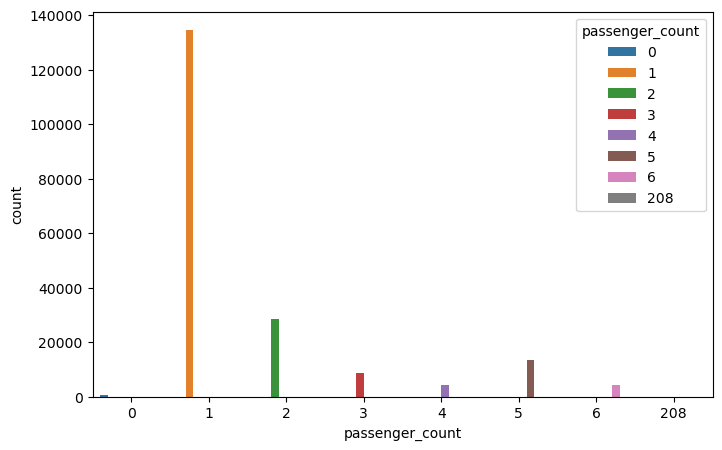

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['passenger_count'],hue='passenger_count',data=df,width=0.8)
plt.show()

# Insights from above plot:

 * Most of the passenger are traveling alone. 
 * As we can see from the above plot we have a outlier in column 'passenger_count'.
 * We have one value as 208 in 'passenger_count'.
 * Looks like customer has booked a vechile who's accommodation capacity is very high.
 * This outlier is not going to help us in future analysis.
 

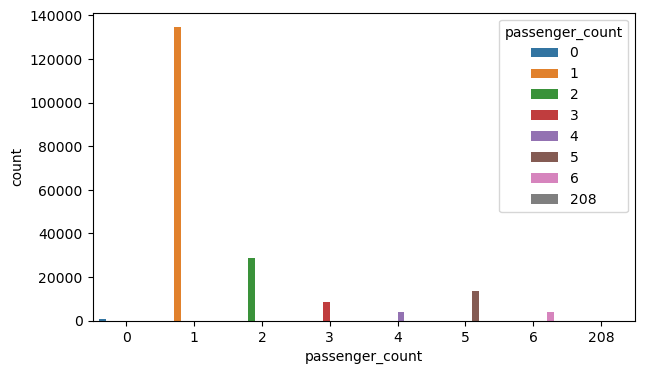

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x=df['passenger_count'],hue='passenger_count',data=df)
plt.show()

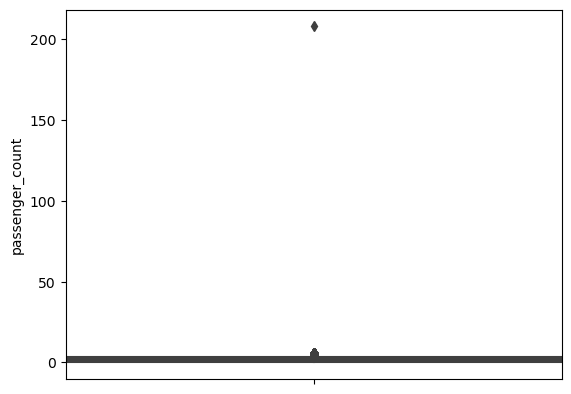

In [34]:
sns.boxplot(y=df['passenger_count'],hue='passenger_count',data=df,width=50)
plt.show()

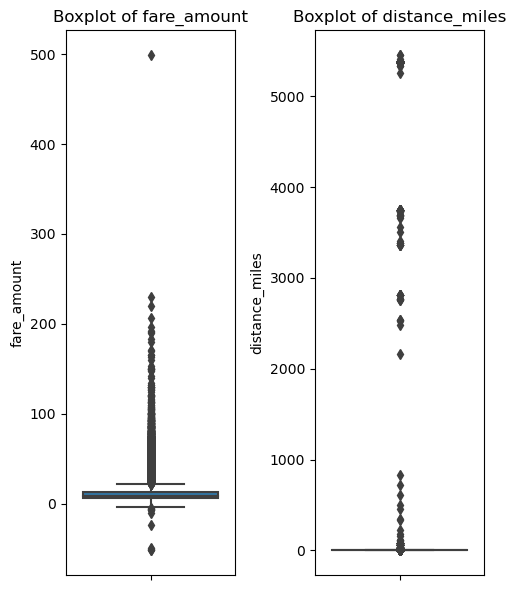

In [35]:
import math
n=6
plt.figure(figsize=[15, 6 * math.ceil(len(nf) / n)])
for i, feature in enumerate(nf):
    plt.subplot(math.ceil(len(nf) / n), n, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [36]:
df=df.drop(columns='Unnamed: 0')

In [37]:
df['fare_amount'].describe()

count    194355.000000
mean         11.353316
std           9.753430
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

# Dealing with negative values in 'fare_amount' column:
 
 * As we can see that here some 'fare_amount' values are negative. 
 * Since fare amount can't be negative.
 * So coverting neative values of 'fare_amount'.
 * Using abs function from numpy for this conversion.

In [38]:
df['fare_amount'] = df['fare_amount'].apply(np.abs)

In [39]:
df['fare_amount'].describe()

count    194355.000000
mean         11.356288
std           9.749969
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [40]:
(df['fare_amount'] == 0).sum()

3

In [41]:
print(df['fare_amount'].value_counts())

fare_amount
6.50      9417
4.50      8004
8.50      7328
5.70      5646
5.30      5645
          ... 
73.83        1
44.25        1
100.90       1
54.30        1
89.10        1
Name: count, Length: 1202, dtype: int64


# 
 * There are total 1202 unique values in the column 'fare_amount'.

In [42]:
passenger_fare_totals = df.groupby('passenger_count')['fare_amount'].sum()
passenger_fare_totals

passenger_count
0         6438.60
1      1511766.22
2       337450.82
3        99270.23
4        48468.88
5       152868.78
6        50876.15
208         11.70
Name: fare_amount, dtype: float64

# 
 * Maximum amount of fair is being genrated by the passenger traveling alone.

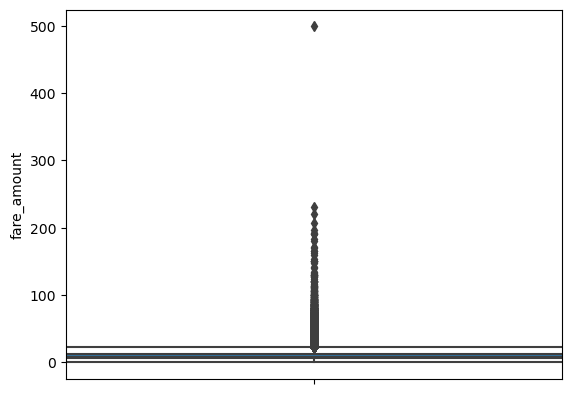

In [43]:
sns.boxplot(y=df['fare_amount'],data=df,width=50)
plt.show()

# Dealing with the outliers in column 'fare_amount':
 
 * Setting Upper bond and Lower bond.

In [44]:
# Calculating the first quartile (Q1) and the third quartile (Q3)
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

IQR = Q3 - Q1              #Interquartile Range (IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [45]:
# Cliping the values within the bounds:
df['fare_amount'] = df['fare_amount'].clip(lower_bound, upper_bound)

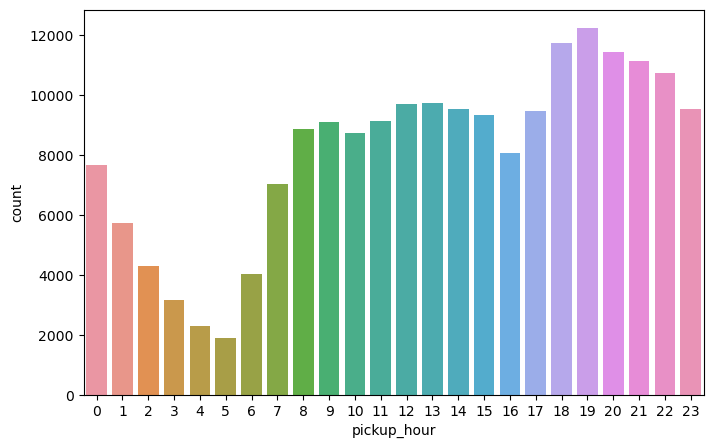

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='pickup_hour',data=df)
plt.show()

# Insights from above plot:
 * 19 is our pick hour.
 * In the mid night at 0 hour booking is low we need to focous here and try to attract customer by providing coupons.
 * In between 1-7 hour the count is low this might be because of late night timing but we should try to attract customer in this
   time period.
 * In between 8-17 hour booking is low we need to focous here because the chance of improvement is very high in this time period
   we can introduce new coupon for office and school going customers and even we can promote car pulling service.
 * In between 20-23 hour we can see a continious decrease customer number this might be because of increase in waiting time so
   we need to focous in this time period because there is a chance of improvement.

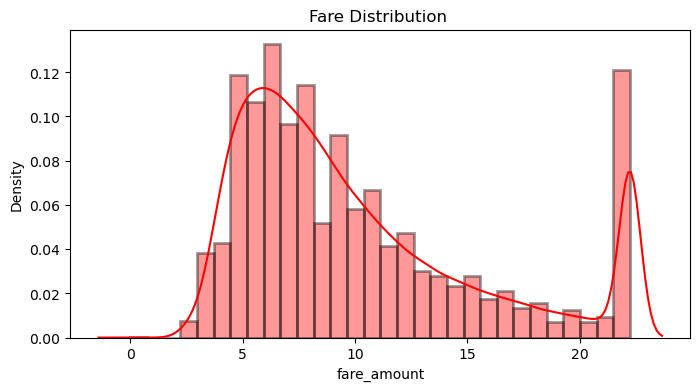

In [47]:
plt.figure(figsize=[8,4])
sns.distplot(df['fare_amount'], color='r',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Fare Distribution ')
plt.show()

In [48]:
pickup_hour_fare_totals = df.groupby('pickup_hour')['fare_amount'].sum()
pickup_hour_fare_totals

pickup_hour
0      80972.33
1      61041.50
2      44975.16
3      33864.05
4      27243.01
5      22691.41
6      39968.52
7      68348.73
8      86931.36
9      89722.67
10     85901.44
11     90894.31
12     96601.63
13     97255.68
14     97479.67
15     94759.08
16     81008.39
17     95239.62
18    116284.09
19    118387.47
20    112176.68
21    111074.15
22    110239.96
23     99446.18
Name: fare_amount, dtype: float64

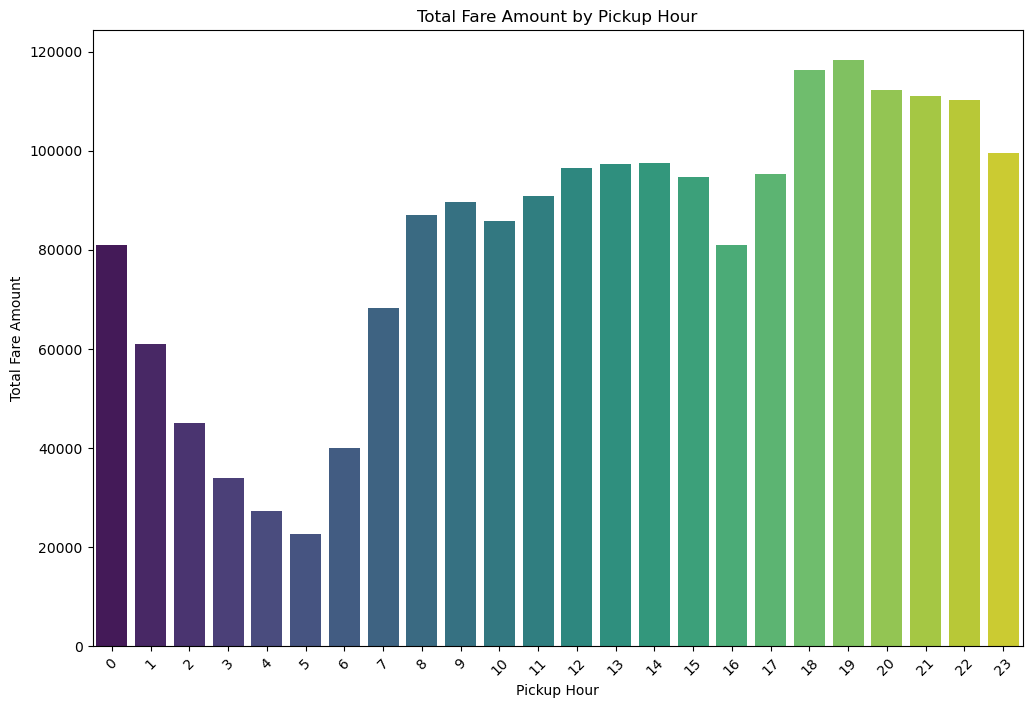

In [49]:
pickup_hour_fare_totals = df.groupby('pickup_hour')['fare_amount'].sum().reset_index()



plt.figure(figsize=(12, 8))
sns.barplot(x='pickup_hour', y='fare_amount', data=pickup_hour_fare_totals, palette='viridis')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Fare Amount')
plt.title('Total Fare Amount by Pickup Hour')
plt.xticks(rotation=45)
plt.show()

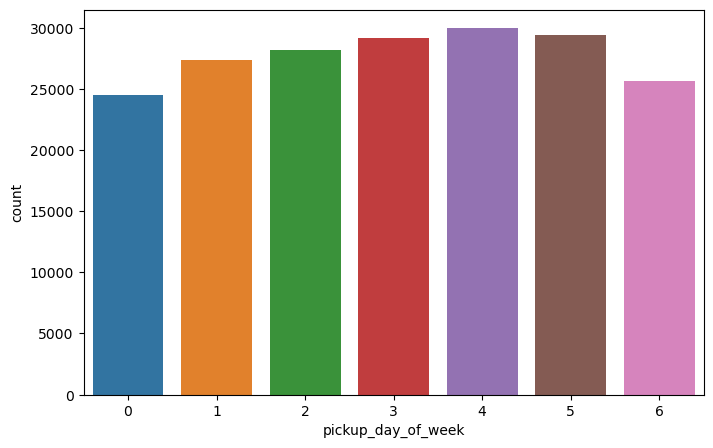

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='pickup_day_of_week',data=df)
plt.show()

# Insights from above plot:
 * In weekend the number of customers are compratively low
 * We should put on some sttractive offers for consumers to plan their weekends.

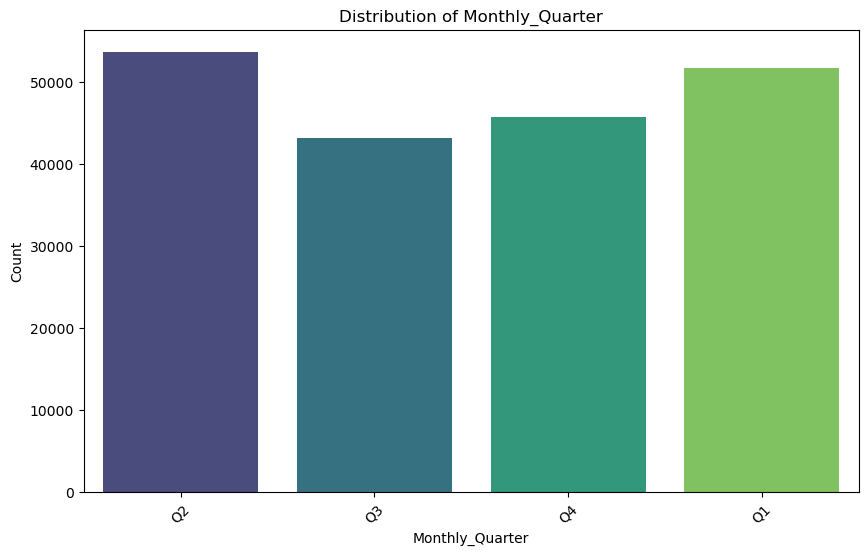

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly_Quarter', palette='viridis')
plt.title('Distribution of Monthly_Quarter')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [52]:
# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Dealing with the outliers present in dataframe:
 * Remove outliers using IQR method

In [53]:
def remove_outliers_iqr(df, numerical_features):
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df


In [54]:
df = remove_outliers_iqr(df, nf)

In [55]:
df.shape

(177977, 10)

# Heatmap:
 
 * To show the coorelation between the columns.

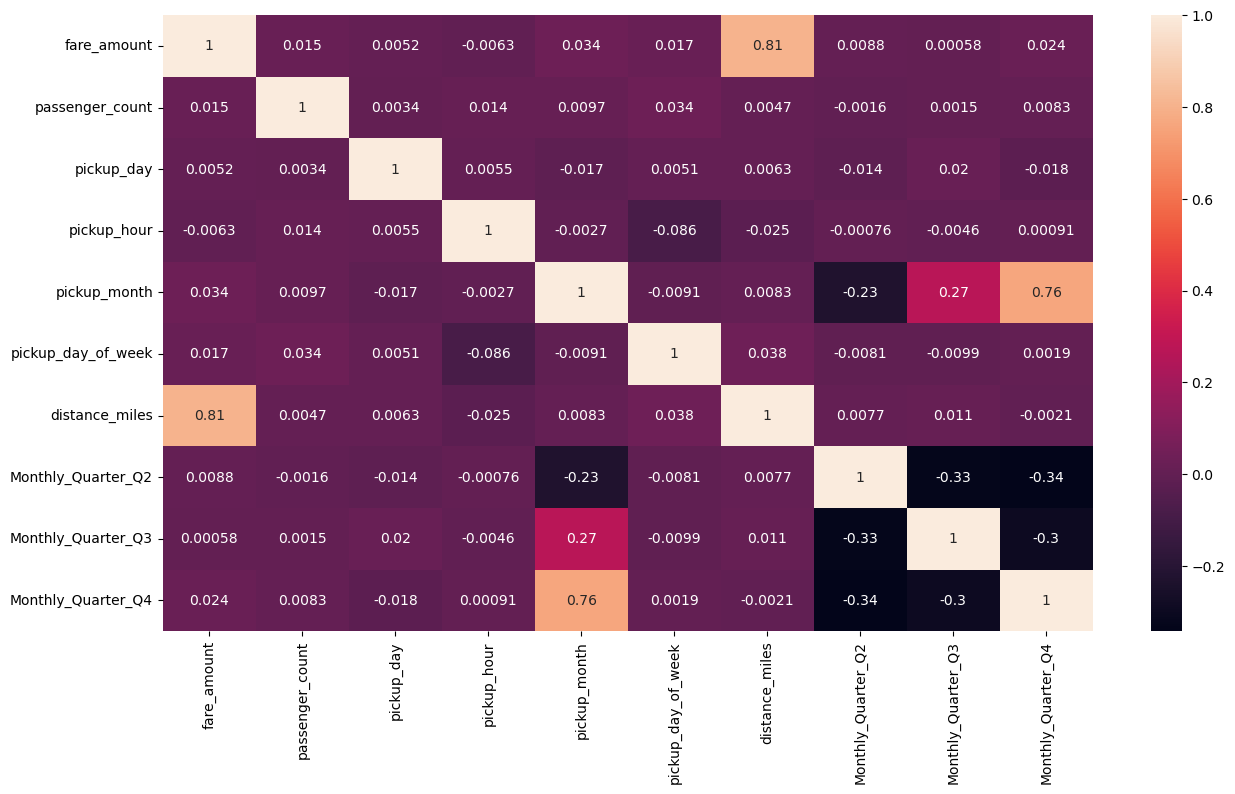

In [56]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
df.columns

Index(['fare_amount', 'passenger_count', 'pickup_day', 'pickup_hour',
       'pickup_month', 'pickup_day_of_week', 'distance_miles',
       'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3', 'Monthly_Quarter_Q4'],
      dtype='object')

In [58]:
df.shape

(177977, 10)

In [59]:
relation=['fare_amount','passenger_count','pickup_hour', 'pickup_day_of_week', 'distance_miles']

relation_matrix=df[relation].corr()

relation_matrix['fare_amount']

fare_amount           1.000000
passenger_count       0.015400
pickup_hour          -0.006335
pickup_day_of_week    0.016704
distance_miles        0.805142
Name: fare_amount, dtype: float64

# Model Building:


# splitting the data:
 * X variable will be containing all the columns other than the target column.
 * Y variable will be containing the target column.

In [60]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [61]:
x_train.head()

,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_day_of_week,distance_miles,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4
86142,2,16,15,5,6,1.303270,True,False,False
122639,1,15,5,11,1,0.665514,False,False,True
184524,3,16,20,7,2,0.940082,False,True,False
182622,1,14,14,7,1,1.014973,False,True,False
50126,1,18,7,11,3,2.872764,False,False,True


In [62]:
x_train.dtypes

passenger_count         int64
pickup_day              int32
pickup_hour             int32
pickup_month            int32
pickup_day_of_week      int32
distance_miles        float64
Monthly_Quarter_Q2       bool
Monthly_Quarter_Q3       bool
Monthly_Quarter_Q4       bool
dtype: object

In [63]:
x_test.dtypes

passenger_count         int64
pickup_day              int32
pickup_hour             int32
pickup_month            int32
pickup_day_of_week      int32
distance_miles        float64
Monthly_Quarter_Q2       bool
Monthly_Quarter_Q3       bool
Monthly_Quarter_Q4       bool
dtype: object

# Data Scaling/Normalization:

In [64]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Testing a Linear Regression model with statsmodels:

In [65]:
# Convert boolean columns to integers
df['Monthly_Quarter_Q2'] = df['Monthly_Quarter_Q2'].astype(int)
df['Monthly_Quarter_Q3'] = df['Monthly_Quarter_Q3'].astype(int)
df['Monthly_Quarter_Q4'] = df['Monthly_Quarter_Q4'].astype(int)


In [66]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 3.669e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:32:48   Log-Likelihood:            -4.2074e+05
No. Observations:              177977   AIC:                         8.415e+05
Df Residuals:                  177967   BIC:                         8.416e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5236      0

In [67]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

              feature        VIF
0               const  24.092299
1     passenger_count   1.001587
2          pickup_day   1.001449
3         pickup_hour   1.008282
4        pickup_month  17.589950
5  pickup_day_of_week   1.010359
6      distance_miles   1.002358
7  Monthly_Quarter_Q2   4.064591
8  Monthly_Quarter_Q3  10.575656
9  Monthly_Quarter_Q4  22.871284


* The VIF values indicate potential multicollinearity among our independent variables. Multicollinearity occurs when independent variables are highly correlated, which can distort the results of our regression model.

* By removing the variable with the highest VIF, which is Monthly_Quarter_Q4, and then recalculate the VIF for the remaining variables. We will repeat this process until all VIF values are below 10.

In [68]:
x = df[['passenger_count', 'pickup_day', 'pickup_hour', 'pickup_month', 'pickup_day_of_week', 'distance_miles', 'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 4.127e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:32:51   Log-Likelihood:            -4.2076e+05
No. Observations:              177977   AIC:                         8.415e+05
Df Residuals:                  177968   BIC:                         8.416e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5917      0

In [69]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

              feature        VIF
0               const  19.730333
1     passenger_count   1.001582
2          pickup_day   1.001156
3         pickup_hour   1.008282
4        pickup_month   1.105503
5  pickup_day_of_week   1.010356
6      distance_miles   1.002352
7  Monthly_Quarter_Q2   1.149999
8  Monthly_Quarter_Q3   1.173589


* As we can see that the VIF values are below the threshold So, we don't need to remove anything further. 

# Perform RFE

In [70]:
model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)  
fit = rfe.fit(x, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False  True False False  True False  True  True  True]
Feature Ranking: [5 1 4 3 1 2 1 1 1]


In [71]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [72]:
print('explained_variance:',explained_variance)
print()
print('cumulative_variance:',cumulative_variance)

explained_variance: [0.19428712 0.13842594 0.12657797 0.12522718 0.12261681 0.11277635
 0.09696072 0.08312792 0.        ]

cumulative_variance: [0.19428712 0.33271305 0.45929103 0.5845182  0.70713501 0.81991136
 0.91687208 1.         1.        ]


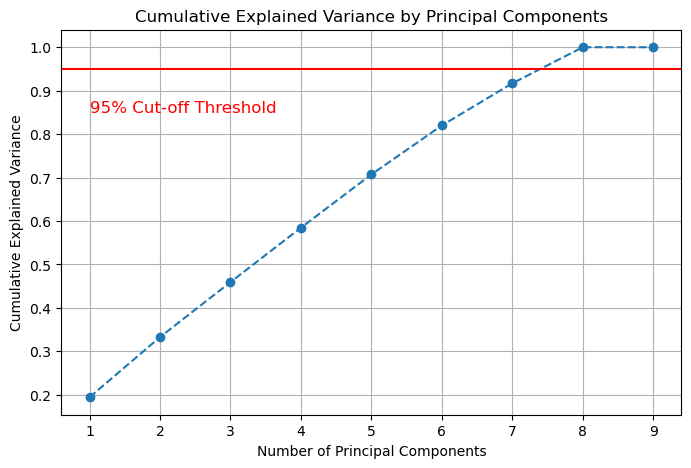

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1, 0.85, '95% Cut-off Threshold', color = 'red', fontsize=12)
plt.grid()
plt.show()

# Predictive Modelling:

In [74]:
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [76]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score

# Standardizing the data
scaler = StandardScaler()
Train_X_std = scaler.fit_transform(x_train)
Test_X_std = scaler.transform(x_train)

# Initialize lists to store RMSE and R-squared results
Trr = []
Tss = []
R2_train = []
R2_test = []
Adj_R2_train = []
Adj_R2_test = []

# Number of features
m = Train_X_std.shape[1]

Tss = []

for i in tqdm(range(m)):
    # Perform PCA
    pca = PCA(n_components=m - i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    
    # Calculate the total explained variance
    total_variance = np.sum(pca.explained_variance_ratio_)
    Tss.append(total_variance)
print("Tss", Tss)

100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

Tss [1.0, 0.99788417600665, 0.9171229786122024, 0.81735466225249, 0.7081465236831307, 0.5975123516635551, 0.48490397005621033, 0.3617257002573968, 0.2166557670243703]


# Multiple Linear Regression(MLR)

In [77]:
X = sm.add_constant(x)

# Split the data into training and test sets
Train_X, Test_X, Train_Y, Test_Y = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
model = sm.OLS(Train_Y, Train_X).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                          2.090e+05
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:33:01   Log-Likelihood:                     -3.4184e+05
No. Observations:              142381   AIC:                                  6.837e+05
Df Residuals:                  142372   BIC:                                  6.838e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

# Make predictions:

In [78]:
Train_pred = model.predict(Train_X)
Test_pred = model.predict(Test_X)

In [79]:
rmse_train = np.sqrt(mean_squared_error(Train_Y, Train_pred))
rmse_test = np.sqrt(mean_squared_error(Test_Y, Test_pred))
r2_train = r2_score(Train_Y, Train_pred)
r2_test = r2_score(Test_Y, Test_pred)

In [80]:
print("Training RMSE:",rmse_train)
print("Training R-squared:",r2_train)
print("Test RMSE:",rmse_test)
print("Test R-squared:",r2_test)

Training RMSE: 2.6697182179230494
Training R-squared: 0.6240454658754633
Test RMSE: 2.6777647715138464
Test R-squared: 0.6164430348428734


* Residuals:

In [81]:
train_residuals = Train_Y - Train_pred
test_residuals = Test_Y - Test_pred

print('train_residuals',train_residuals)
print()
print('test_residuals',test_residuals)

train_residuals 133342   -0.990819
183997    3.547456
31163    -1.772420
88047    -1.338392
30267    -3.149010
            ...   
134695   -0.641472
116544    1.057539
148227    0.714325
165071   -1.098440
137027   -1.483752
Length: 142381, dtype: float64

test_residuals 57791     1.120338
165635   -0.286097
57630    -1.474931
90584     3.786648
6696      1.156819
            ...   
59788     2.755538
108116    2.632581
160974   -2.293496
107210    3.966221
4526     -4.195552
Length: 35596, dtype: float64


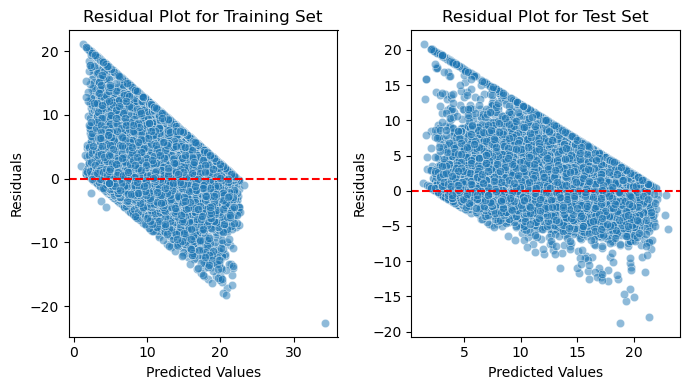

In [82]:
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=Train_pred, y=train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=Test_pred, y=test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


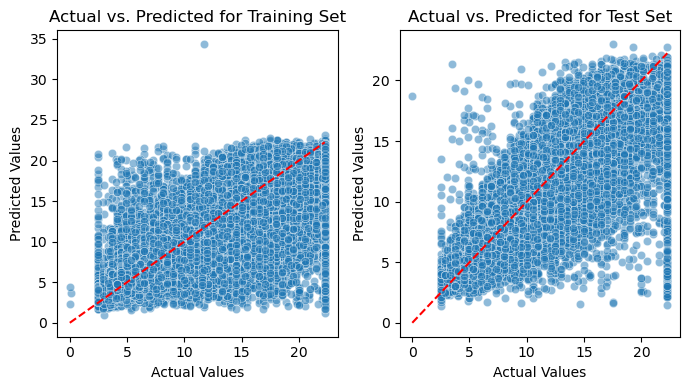

In [83]:
#Actual vs. Predicted for training and test sets
plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x=Train_Y, y=Train_pred, alpha=0.5)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], 'r--')
plt.title('Actual vs. Predicted for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
sns.scatterplot(x=Test_Y, y=Test_pred, alpha=0.5)
plt.plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], 'r--')
plt.title('Actual vs. Predicted for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Ridge regression

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

scaler = StandardScaler()
Train_X_std = pd.DataFrame(scaler.fit_transform(Train_X), columns=Train_X.columns)
Test_X_std = pd.DataFrame(scaler.transform(Test_X), columns=Test_X.columns)

# Define the Ridge Regression model
ridge = Ridge()

# Set up the hyperparameter grid
param_grid = {'alpha': np.logspace(-4, 4, 9)}  # Alpha values from 10^-4 to 10^4

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(Train_X_std, Train_Y)

# Get the best hyperparameter
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:",best_alpha)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best alpha: 10.0


In [85]:
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(Train_X_std, Train_Y)

# Make predictions
pred_train = best_ridge.predict(Train_X_std)
pred_test = best_ridge.predict(Test_X_std)

* Calculating RMSE

In [86]:
rmse_train = np.sqrt(mean_squared_error(Train_Y, pred_train))
rmse_test = np.sqrt(mean_squared_error(Test_Y, pred_test))
print("Training RMSE:",rmse_train)
print(f"Test RMSE:",rmse_test)

Training RMSE: 2.57155318367643
Test RMSE: 2.5790774696022476


* Calculate Adjusted R and adjusted R-squared

In [87]:
n_train = len(Train_Y)
p_train = Train_X_std.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

n_test = len(Test_Y)
p_test = Test_X_std.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print("Training R-squared:",r2_train)
print(f"Test R-squared:",r2_test)
print(f"Training Adjusted R-squared:",adj_r2_train)
print(f"Test Adjusted R-squared:",adj_r2_test)

Training R-squared: 0.6240454658754633
Test R-squared: 0.6164430348428734
Training Adjusted R-squared: 0.6240216998640766
Test Adjusted R-squared: 0.616346030046425


In [88]:
# Define a range of alpha values using logarithmic spacing
alpha_values = np.logspace(-4, 4, 9)

# Initialize lists to store RMSE values for training and test sets
training_rmse = []
testing_rmse = []

# Loop through each alpha value, fit the Ridge model, and compute RMSE for both training and test sets
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(Train_X_std, Train_Y)
    
    train_predictions = ridge_model.predict(Train_X_std)
    test_predictions = ridge_model.predict(Test_X_std)
    
    train_rmse = np.sqrt(mean_squared_error(Train_Y, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(Test_Y, test_predictions))
    
    training_rmse.append(train_rmse)
    testing_rmse.append(test_rmse)

* Plot the RMSE values against alpha values

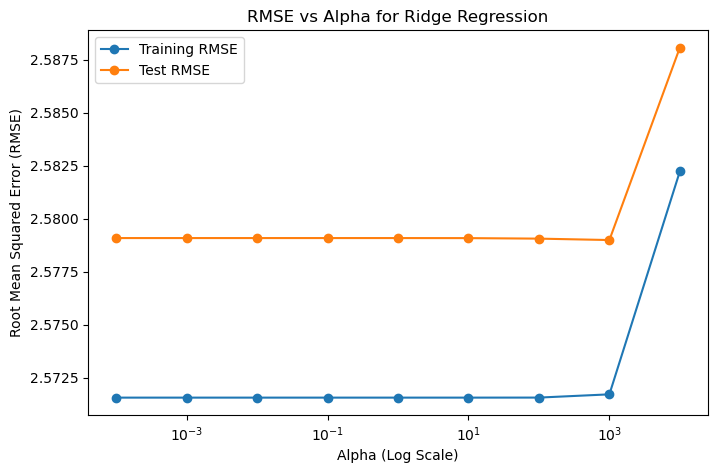

In [89]:
plt.figure(figsize=(8,5))
plt.plot(alpha_values, training_rmse, label='Training RMSE', marker='o')
plt.plot(alpha_values, testing_rmse, label='Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Alpha for Ridge Regression')
plt.legend()
plt.show()

In [90]:
metrics = {
    'Model': [],
    'RMSE_train': [],
    'RMSE_test': [],
    'R2_train': [],
    'R2_test': [],
    'Adj_R2_train': [],
    'Adj_R2_test': []
}

* Define and train Linear Regression

In [91]:
lm = LinearRegression()
lm.fit(Train_X_std, Train_Y)

LinearRegression()

* Make predictions

In [92]:
pred_train_lm = lm.predict(Train_X_std)
pred_test_lm = lm.predict(Test_X_std)

* Calculate metrics for Linear Regression

In [93]:
rmse_train_lm = np.sqrt(mean_squared_error(Train_Y, pred_train_lm))
rmse_test_lm = np.sqrt(mean_squared_error(Test_Y, pred_test_lm))
r2_train_lm = r2_score(Train_Y, pred_train_lm)
r2_test_lm = r2_score(Test_Y, pred_test_lm)
adj_r2_train_lm = 1 - (1 - r2_train_lm) * (len(Train_Y) - 1) / (len(Train_Y) - Train_X_std.shape[1] - 1)
adj_r2_test_lm = 1 - (1 - r2_test_lm) * (len(Test_Y) - 1) / (len(Test_Y) - Test_X_std.shape[1] - 1)

metrics['Model'].append('Linear Regression')
metrics['RMSE_train'].append(rmse_train_lm)
metrics['RMSE_test'].append(rmse_test_lm)
metrics['R2_train'].append(r2_train_lm)
metrics['R2_test'].append(r2_test_lm)
metrics['Adj_R2_train'].append(adj_r2_train_lm)
metrics['Adj_R2_test'].append(adj_r2_test_lm)

In [94]:
for i in tqdm(range(m)):
    ridge = Ridge(alpha=best_alpha)
    
    # Perform RFE
    rfe = RFE(ridge, n_features_to_select=m - i)
    rfe.fit(Train_X_std, Train_Y)
    
    selected_features = Train_X_std.loc[:, rfe.support_]
    test_selected_features = Test_X_std.loc[:, rfe.support_]
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=2)  # Change degree as needed
    Train_X_poly = poly.fit_transform(selected_features)
    Test_X_poly = poly.transform(test_selected_features)
    
    # Fit Ridge model with selected features and polynomial features
    ridge.fit(Train_X_poly, Train_Y)
    
    # Make predictions
    pred_train_poly = ridge.predict(Train_X_poly)
    pred_test_poly = ridge.predict(Test_X_poly)
    
    # Calculate metrics for Polynomial Ridge Regression
    rmse_train_poly = np.sqrt(mean_squared_error(Train_Y, pred_train_poly))
    rmse_test_poly = np.sqrt(mean_squared_error(Test_Y, pred_test_poly))
    r2_train_poly = r2_score(Train_Y, pred_train_poly)
    r2_test_poly = r2_score(Test_Y, pred_test_poly)
    adj_r2_train_poly = 1 - (1 - r2_train_poly) * (len(Train_Y) - 1) / (len(Train_Y) - Train_X_poly.shape[1] - 1)
    adj_r2_test_poly = 1 - (1 - r2_test_poly) * (len(Test_Y) - 1) / (len(Test_Y) - Test_X_poly.shape[1] - 1)
    
    # Append metrics for the current iteration
    metrics['Model'].append(f'Poly Ridge Regression (Features: {m - i})')
    metrics['RMSE_train'].append(rmse_train_poly)
    metrics['RMSE_test'].append(rmse_test_poly)
    metrics['R2_train'].append(r2_train_poly)
    metrics['R2_test'].append(r2_test_poly)
    metrics['Adj_R2_train'].append(adj_r2_train_poly)
    metrics['Adj_R2_test'].append(adj_r2_test_poly)

100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


In [95]:
#Convert Metrics to a DataFrame and Display
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)
# Optionally, you can save the metrics to a CSV file for further analysis
metrics_df.to_csv('model_comparison_metrics.csv', index=False)

                                 Model  RMSE_train  RMSE_test  R2_train  \
0                    Linear Regression    2.571553   2.579080  0.651185   
1  Poly Ridge Regression (Features: 9)    2.541376   2.548973  0.659323   
2  Poly Ridge Regression (Features: 8)    2.541915   2.549136  0.659179   
3  Poly Ridge Regression (Features: 7)    2.542145   2.549275  0.659117   
4  Poly Ridge Regression (Features: 6)    2.543009   2.549958  0.658885   
5  Poly Ridge Regression (Features: 5)    2.548688   2.556654  0.657360   
6  Poly Ridge Regression (Features: 4)    2.570486   2.577211  0.651474   
7  Poly Ridge Regression (Features: 3)    2.570489   2.577204  0.651473   
8  Poly Ridge Regression (Features: 2)    2.573911   2.580036  0.650545   
9  Poly Ridge Regression (Features: 1)    2.577061   2.581781  0.649689   

    R2_test  Adj_R2_train  Adj_R2_test  
0  0.644193      0.651163     0.644103  
1  0.652451      0.659192     0.651914  
2  0.652407      0.659071     0.651967  
3  0.65236

# Plotting RMSE for different models

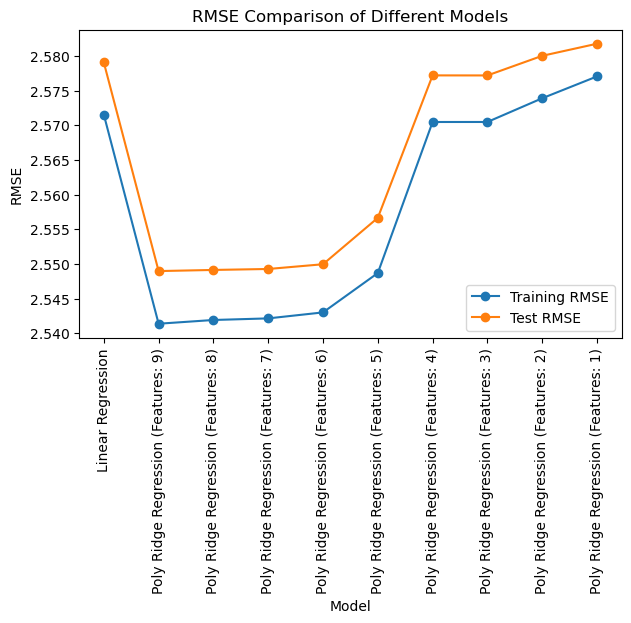

In [96]:
plt.figure(figsize=[7,4])
plt.plot(metrics_df['Model'], metrics_df['RMSE_train'], label='Training RMSE', marker='o')
plt.plot(metrics_df['Model'], metrics_df['RMSE_test'], label='Test RMSE', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.legend()
plt.show()

In [97]:
#Convert Metrics to a DataFrame and Display
metrics_df = pd.DataFrame(metrics)


In [98]:
print(metrics_df)
# Optionally, you can save the metrics to a CSV file for further analysis
metrics_df.to_csv('model_comparison_metrics.csv', index=False)

                                 Model  RMSE_train  RMSE_test  R2_train  \
0                    Linear Regression    2.571553   2.579080  0.651185   
1  Poly Ridge Regression (Features: 9)    2.541376   2.548973  0.659323   
2  Poly Ridge Regression (Features: 8)    2.541915   2.549136  0.659179   
3  Poly Ridge Regression (Features: 7)    2.542145   2.549275  0.659117   
4  Poly Ridge Regression (Features: 6)    2.543009   2.549958  0.658885   
5  Poly Ridge Regression (Features: 5)    2.548688   2.556654  0.657360   
6  Poly Ridge Regression (Features: 4)    2.570486   2.577211  0.651474   
7  Poly Ridge Regression (Features: 3)    2.570489   2.577204  0.651473   
8  Poly Ridge Regression (Features: 2)    2.573911   2.580036  0.650545   
9  Poly Ridge Regression (Features: 1)    2.577061   2.581781  0.649689   

    R2_test  Adj_R2_train  Adj_R2_test  
0  0.644193      0.651163     0.644103  
1  0.652451      0.659192     0.651914  
2  0.652407      0.659071     0.651967  
3  0.65236

# Plotting R-squared for different models

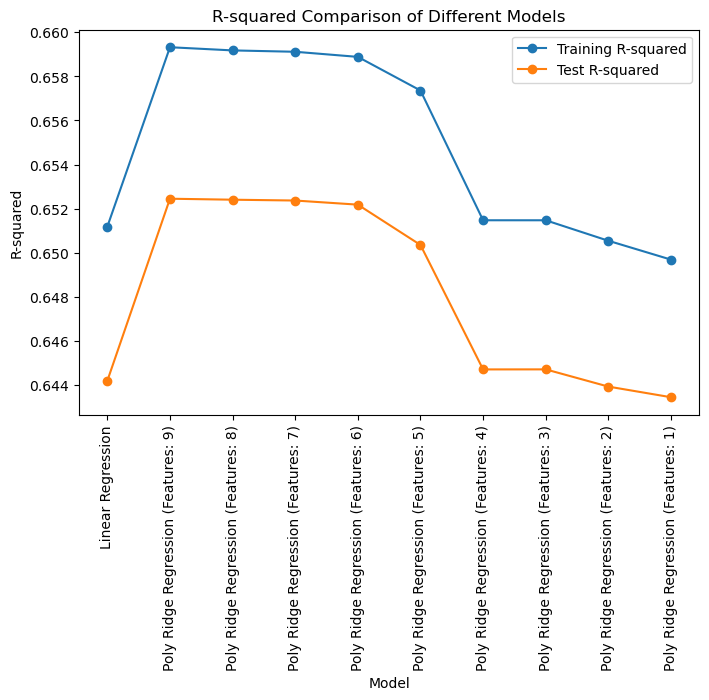

In [99]:
plt.figure(figsize=[8,5])
plt.plot(metrics_df['Model'], metrics_df['R2_train'], label='Training R-squared', marker='o')
plt.plot(metrics_df['Model'], metrics_df['R2_test'], label='Test R-squared', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Different Models')
plt.legend()
plt.show()

# Plotting Adjusted R-squared for different models

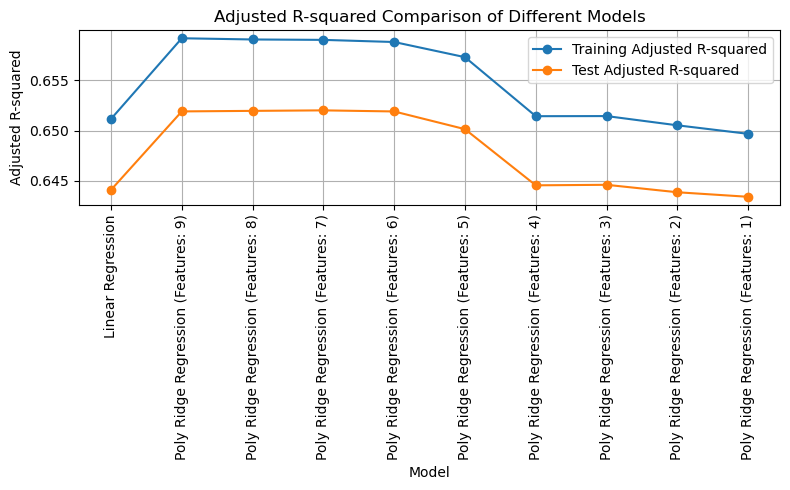

In [100]:
plt.figure(figsize=[8,5])
plt.plot(metrics_df['Model'], metrics_df['Adj_R2_train'], label='Training Adjusted R-squared', marker='o')
plt.plot(metrics_df['Model'], metrics_df['Adj_R2_test'], label='Test Adjusted R-squared', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared Comparison of Different Models')
plt.legend()
plt.grid(True)  # Added grid for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

# Insights from all three comparison plot :
 
 # Adjusted R-squared Comparison:

* Training Adjusted R-squared:
 * Linear Regression and Polynomial Ridge Regression with 9, 8, and 7 features exhibit the highest training adjusted R-squared values.
* As the number of features decreases below 6, the training adjusted R-squared values also drop, indicating less fit to the training data.
* Test Adjusted R-squared:
* Polynomial Ridge Regression with 8 and 7 features shows the highest test adjusted R-squared values.
* The test adjusted R-squared drops significantly with fewer features, highlighting the models' reduced predictive power on unseen data with fewer features.
# R-squared Comparison:

* Training R-squared:
* Similar to the adjusted R-squared, the training R-squared is highest for models with more features, peaking at 9, 8, and 7 features.
* Test R-squared:
* Polynomial Ridge Regression models with 8 and 7 features have the highest test R-squared values.
* Test R-squared values decrease notably for models with fewer than 6 features.

# RMSE Comparison:

* Training RMSE:
* The training RMSE is lowest for Polynomial Ridge Regression with 9, 8, and 7 features, indicating better fit on the training data.
* RMSE values increase as the number of features decreases, indicating poorer model performance.
* Test RMSE:
* The lowest test RMSE values are observed for Polynomial Ridge Regression with 8 and 7 features.
* Test RMSE increases with fewer features, showing the models' reduced accuracy on the test set with fewer features.

# Conclusion:
 
 # Model Performance:

* Polynomial Ridge Regression models with 8 and 7 features provide the best balance between training and test performance, as  indicated by higher adjusted R-squared and R-squared values, and lower RMSE.
* These models demonstrate strong predictive power and generalization ability compared to other models evaluated.

# Feature Selection:

* Including more features (up to a certain point) enhances model performance, as observed with the Polynomial Ridge Regression models.
* However, models with too many or too few features may suffer from overfitting or underfitting, respectively.

# Recommendation:

* Polynomial Ridge Regression with 8 features is recommended as the optimal model for predicting fare prices due to its superior performance across the evaluation metrics.